## Ingresso vs Conclusão nos cursos


In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [107]:
# Leitura do dataset "discentes-ingressos-sisu-2020-ufpe"

df_ingressos_sisu = pd.read_csv( 'discentes-ingressos-sisu-2020-ufpe.csv' )

df_ingressos_sisu = df_ingressos_sisu[['COTA', 'SEXO', 'NATURALIDADE', 'UF_ENDERECO', 'DEFICIENCIA']]
#df_ingressos_sisu.columns = ['SEXO', 'NOME_CURSO', 'DATA_INGRESSO'] #Padronizando colunas
df_ingressos_sisu.tail()

,COTA,SEXO,NATURALIDADE,UF_ENDERECO,DEFICIENCIA
6906,S,F,VITORIA DE SANTO ANTAO,PE,N
6907,N,F,VITORIA DE SANTO ANTAO,PE,N
6908,N,F,VITORIA DE SANTO ANTAO,PE,N
6909,N,M,VITORIA DE SANTO ANTAO,PE,N
6910,S,M,VITORIA DE SANTO ANTAO,PE,S


In [108]:
# Leitura do dataset "microdados-matriculas"

df_microdados_matriculas = pd.read_csv( 'microdados-matriculas.csv', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False )

df_microdados_matriculas = df_microdados_matriculas[['Sexo', 'Cor / Raça', 'UF']]
df_microdados_matriculas.columns = ['SEXO', 'RAÇA', 'UF_ENDERECO'] #Padronizando colunas
df_microdados_matriculas.tail()

/Users/marina/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/marina/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,SEXO,RAÇA,UF_ENDERECO
434214,M,Amarela,MS
434215,F,Amarela,CE
434216,M,Amarela,PE
434217,F,Amarela,DF
434218,M,Amarela,SC


In [109]:
# Junção dos dados 

dados_sociais = df_ingressos_sisu.append(df_microdados_matriculas, ignore_index=True)

dados_sociais_feminino = dados_sociais.loc[dados_sociais['SEXO'] == 'F']
dados_sociais_masculino = dados_sociais.loc[dados_sociais['SEXO'] == 'M']

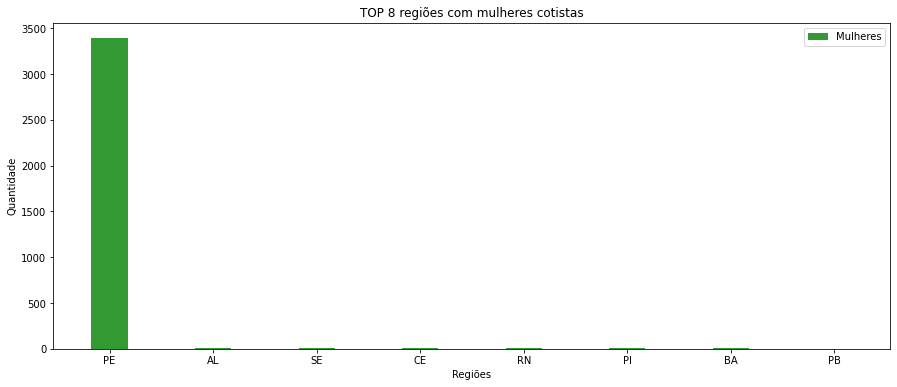

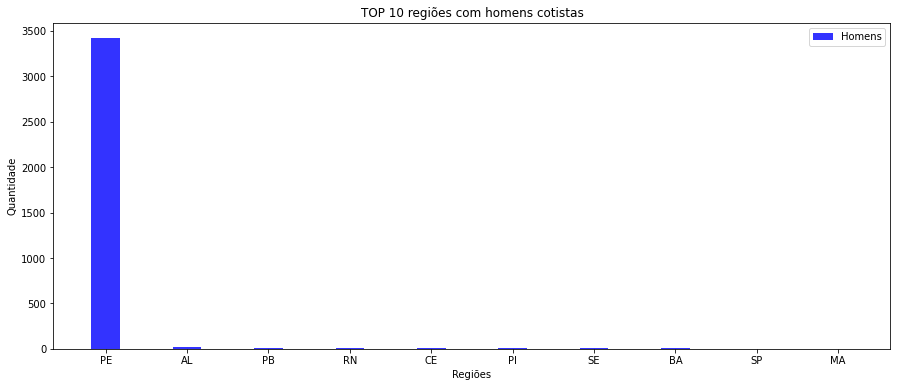

In [110]:
# Região mastrículas

dados_sociais_feminino_regiao = dados_sociais_feminino.groupby('UF_ENDERECO').count().sort_values('NATURALIDADE', ascending=False).reset_index()[:8]
dados_sociais_masculino_regiao = dados_sociais_masculino.groupby('UF_ENDERECO').count().sort_values('NATURALIDADE', ascending=False).reset_index()[:10]

#--------------------MULHERES----------------------

# data to plot
n_groups = 8

# create plot
fig = plt.subplots(figsize=(15,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects2 = plt.bar(index + bar_width, dados_sociais_feminino_regiao['COTA'], bar_width,
alpha=opacity,
color='g',
label='Mulheres')

plt.xlabel('Regiões')
plt.ylabel('Quantidade')
plt.title('TOP 8 regiões com mulheres cotistas')
plt.xticks(index + bar_width, (dados_sociais_feminino_regiao['UF_ENDERECO']))
plt.legend()

plt.show()

#--------------------HOMENS----------------------

# data to plot
n_groups = 10

# create plot
fig = plt.subplots(figsize=(15,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects2 = plt.bar(index + bar_width, dados_sociais_masculino_regiao['COTA'], bar_width,
alpha=opacity,
color='b',
label='Homens')

plt.xlabel('Regiões')
plt.ylabel('Quantidade')
plt.title('TOP 10 regiões com homens cotistas')
plt.xticks(index + bar_width, (dados_sociais_masculino_regiao['UF_ENDERECO']))
plt.legend()

plt.show()



No handles with labels found to put in legend.


  COTA SEXO  NATURALIDADE  UF_ENDERECO  DEFICIENCIA  RAÇA
0    S    F          1689         1689         1689     0
1    S    M          1756         1759         1759     0


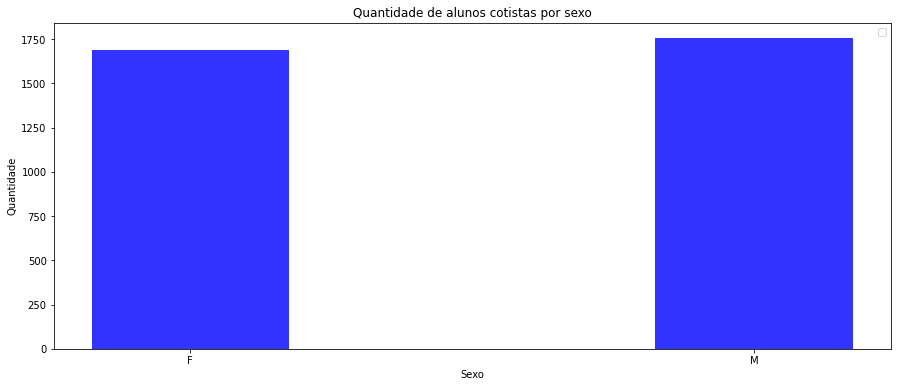

In [122]:
# Quantidade de cotistas

alunos_cotistas = dados_sociais.loc[(dados_sociais['COTA'] == 'S')].groupby(['COTA', 'SEXO']).count().reset_index()

print(alunos_cotistas)

# data to plot
n_groups = 2

# create plot
fig = plt.subplots(figsize=(15,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + bar_width, alunos_cotistas['NATURALIDADE'], bar_width,
alpha=opacity,
color='b',)

plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Quantidade de alunos cotistas por sexo')
plt.xticks(index + bar_width, (alunos_cotistas['SEXO']))
plt.legend()

plt.show()


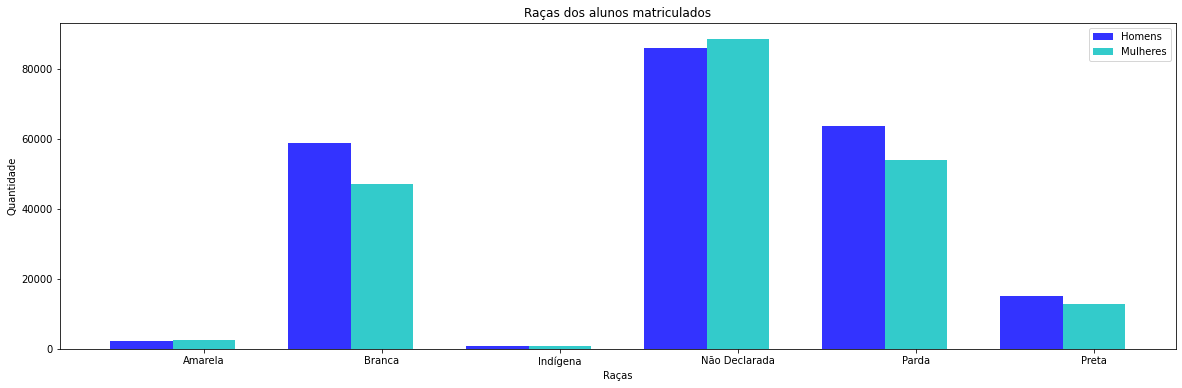

In [112]:
# Raça dos alunos


raca_alunos = dados_sociais.loc[(dados_sociais['RAÇA'] != 'NaN')].groupby(['RAÇA', 'SEXO']).count().reset_index()

raca_mulheres = raca_alunos.loc[(raca_alunos['SEXO'] == 'F')].groupby(['RAÇA', 'SEXO', 'UF_ENDERECO']).count().reset_index()
raca_homens = raca_alunos.loc[(raca_alunos['SEXO'] == 'M')].groupby(['RAÇA', 'SEXO', 'UF_ENDERECO']).count().reset_index()

# data to plot
n_groups = 6

# create plot
fig = plt.subplots(figsize=(20,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, raca_homens['UF_ENDERECO'], bar_width,
alpha=opacity,
color='b',
label='Homens')

rects2 = plt.bar(index + bar_width, raca_mulheres['UF_ENDERECO'], bar_width,
alpha=opacity,
color='c',
label='Mulheres')

plt.xlabel('Raças')
plt.ylabel('Quantidade')
plt.title('Raças dos alunos matriculados')
plt.xticks(index + bar_width, (raca_mulheres['RAÇA']))
plt.legend()

plt.show()


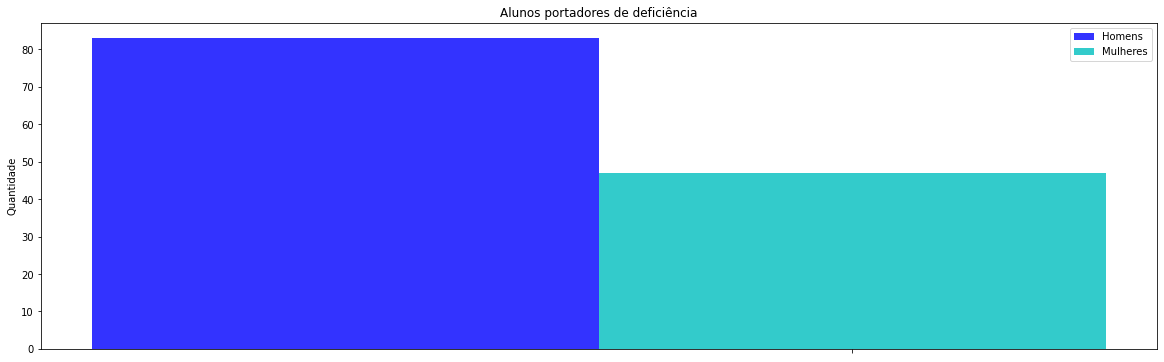

In [119]:
# Alunos com deficiencias 

alunos_deficientes = dados_sociais.loc[(dados_sociais['DEFICIENCIA'] == 'S')].groupby(['DEFICIENCIA', 'SEXO']).count().reset_index()

mulheres_deficientes = alunos_deficientes.loc[(alunos_deficientes['SEXO'] == 'F')].groupby(['DEFICIENCIA', 'SEXO', 'UF_ENDERECO']).count().reset_index()
homens_deficientes = alunos_deficientes.loc[(alunos_deficientes['SEXO'] == 'M')].groupby(['DEFICIENCIA', 'SEXO', 'UF_ENDERECO']).count().reset_index()

# data to plot
n_groups = 1

# create plot
fig = plt.subplots(figsize=(20,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, homens_deficientes['UF_ENDERECO'], bar_width,
alpha=opacity,
color='b',
label='Homens')

rects2 = plt.bar(index + bar_width, mulheres_deficientes['UF_ENDERECO'], bar_width,
alpha=opacity,
color='c',
label='Mulheres')

plt.ylabel('Quantidade')
plt.title('Alunos portadores de deficiência')
plt.xticks(index + bar_width, (['']))
plt.legend()

plt.show()
